# Thompson Sampling

Steps: in each round, consider Ni1(n) = no. of times ad i got reward 1 upto round n, Ni0(n) = no. of times ad i got reward 0 upto round n -> for each ad i, take random draw from the distribution theta i (n) = beta(Ni1(n)+1, Ni0(n)+1) -> select ad having highest theta i(n)

Every round -> hypothetically pull random points from expected distr -> pull lever, adjust our perception of the expected distr acc to the result, gets narrower (refine)

UCB -> deterministic, req update at every round
<br>
TS -> probabilistic, can accommodate delayed feedback, better empirical evidence

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [4]:
import random
N = 10000
d = 10
ads_selected = []
reward_1 = [0]*d
reward_0 = [0]*d
total_reward = 0
for n in range(N):
    ad = 0
    max_random_draw = 0
    for i in range(d):
        random_beta = random.betavariate(reward_1[i]+1, reward_0[i]+1)
        if random_beta > max_random_draw:
            max_random_draw = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        reward_1[ad]+=1
    else:
        reward_0[ad]+=1
    total_reward+=reward

## Visualising the results - Histogram

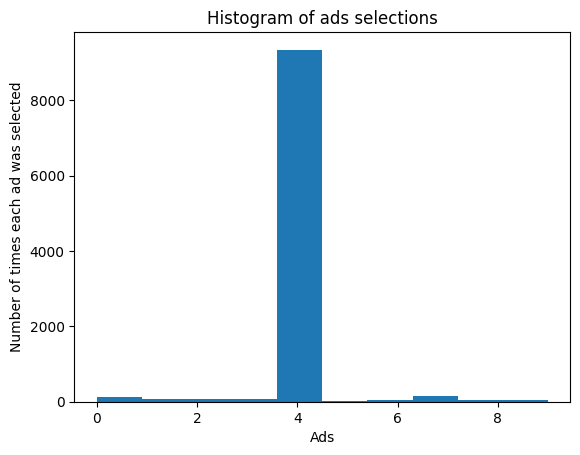

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()